In [84]:
import pandas as pd

In [85]:
dados = pd.read_csv("data/export_dados_juntos.csv")

In [86]:
dados.head(5)

,IDADE,SALARIO_ANUAL,SITUCAO_MORADIA,ANOS_EMPREGO,MOTIVO_EMPRESTIMO,RANKING_EMPRESTIMO,VALOR_SOLICITADO,TAXA_DE_JURO,RISCO_INADIMP,EMP_VS_RENDA,HISTORICO_INADIMP,ANOS_DE_CREDITO
0,21.0,60000.0,Alugada,2.0,Educativo,B,8000.0,11.26,0.0,0.13,N,3
1,40.0,70000.0,Hipotecada,6.0,Educativo,A,18000.0,7.90,0.0,0.26,N,14
2,29.0,115000.0,Hipotecada,3.0,Médico,C,22000.0,15.23,0.0,0.19,S,7
3,26.0,84996.0,Alugada,0.0,Médico,B,9000.0,11.26,0.0,0.11,N,2
4,23.0,54500.0,Alugada,2.0,Pagamento de débitos,A,8000.0,NaN,0.0,0.15,N,2


## Remoção de dados nulos

In [87]:
linhas = dados.shape[0]
colunas= dados.shape[1]
duplicados = (dados.duplicated()).sum()
nulos = (dados.isnull()).sum()
print('A base de dados tem {} Linhas e {} Colunas.'.format(linhas, colunas))
print('A base de dados tem {} dados duplicados'.format(duplicados))
print('Dados nulos:\n\n{}'.format(nulos))

A base de dados tem 34485 Linhas e 12 Colunas.
A base de dados tem 165 dados duplicados
Dados nulos:

IDADE                  320
SALARIO_ANUAL          335
SITUCAO_MORADIA        331
ANOS_EMPREGO          1254
MOTIVO_EMPRESTIMO      311
RANKING_EMPRESTIMO     309
VALOR_SOLICITADO       331
TAXA_DE_JURO          3626
RISCO_INADIMP          343
EMP_VS_RENDA           315
HISTORICO_INADIMP      366
ANOS_DE_CREDITO          0
dtype: int64


In [88]:
dados.dropna(inplace=True)

In [89]:
linhas = dados.shape[0]
colunas= dados.shape[1]
duplicados = (dados.duplicated()).sum()
nulos = (dados.isnull()).sum()
print('A base de dados tem {} Linhas e {} Colunas.'.format(linhas, colunas))
print('A base de dados tem {} dados duplicados'.format(duplicados))
print('Dados nulos:\n\n{}'.format(nulos))

A base de dados tem 28638 Linhas e 12 Colunas.
A base de dados tem 137 dados duplicados
Dados nulos:

IDADE                 0
SALARIO_ANUAL         0
SITUCAO_MORADIA       0
ANOS_EMPREGO          0
MOTIVO_EMPRESTIMO     0
RANKING_EMPRESTIMO    0
VALOR_SOLICITADO      0
TAXA_DE_JURO          0
RISCO_INADIMP         0
EMP_VS_RENDA          0
HISTORICO_INADIMP     0
ANOS_DE_CREDITO       0
dtype: int64


## Tratamento de outliers

<AxesSubplot: >

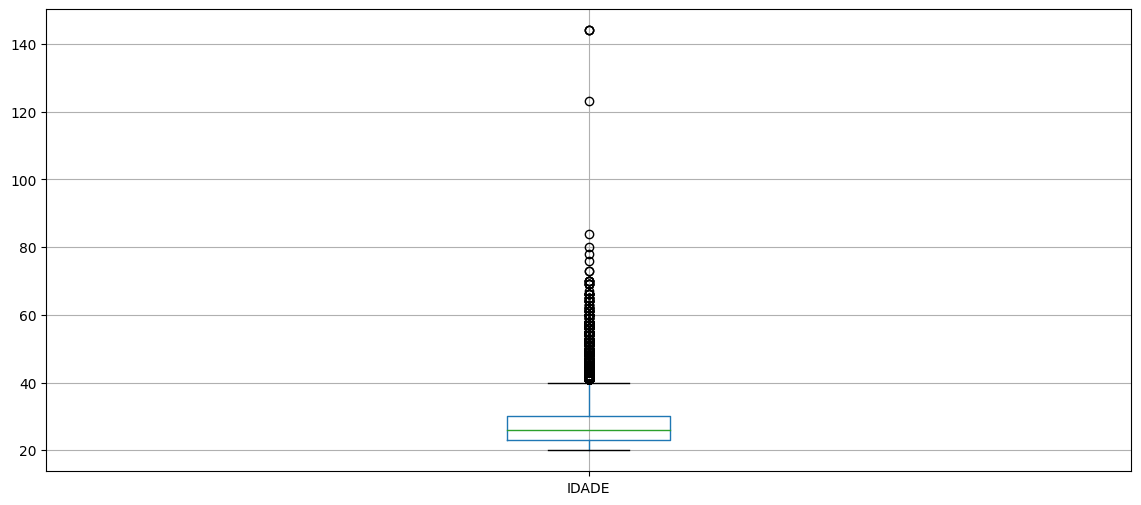

In [90]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14,6))

dados.boxplot(['IDADE'])

In [91]:
dados.drop(dados[dados.IDADE>85].index, axis=0, inplace=True)

<AxesSubplot: >

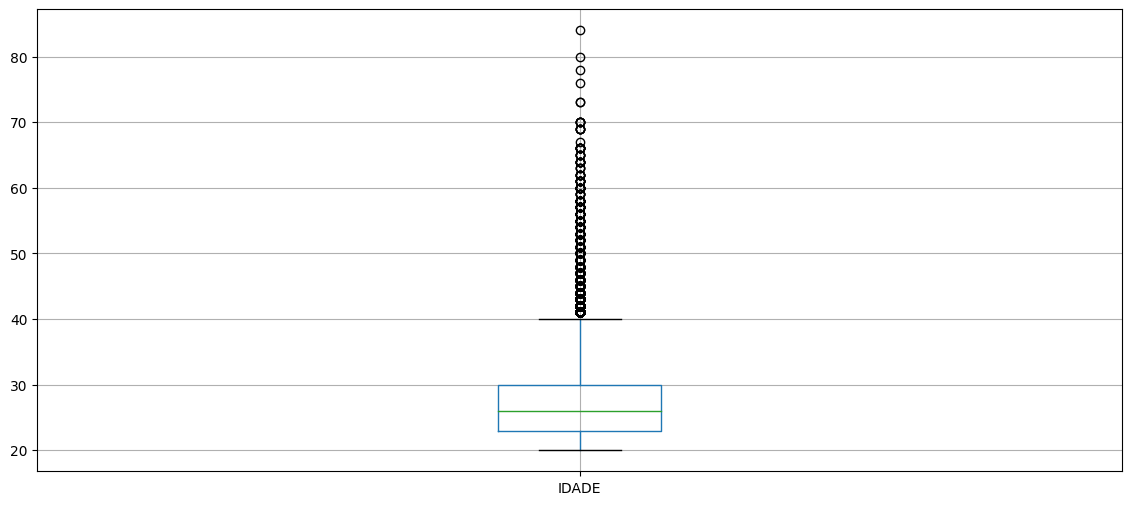

In [92]:
dados.boxplot(['IDADE'])

In [95]:
# parei

In [93]:
q1 = dados.IDADE.quantile(.25) # primeiro quartil
q3 = dados.IDADE.quantile(.75) # terceiro quartil
iiq = q3 - q1 # intervalo inter-quartil
lim_infer = q1 - 1.5 * iiq # limite inferior
lim_super = q3 + 1.5 * iiq # limite superior

In [94]:
lim_super


40.5